# Recommendation

In [1]:
from pandas import read_csv, DataFrame, Series

In [2]:
# import the data (take longtime)
# retrive from here https://www.kaggle.com/datasets/stackoverflow/stacksample/data
raw_answers: DataFrame = read_csv('./data/Answers.csv', encoding='latin-1')
raw_questions: DataFrame = read_csv('./data/Questions.csv', encoding='latin-1')
raw_tags: DataFrame = read_csv('./data/Tags.csv', encoding='latin-1')

## Data cleaning and fitting

In [65]:
# creating copy before:
questions = raw_questions.copy()
answers = raw_answers.copy()
tags = raw_tags.copy()

In [66]:
# make a list of tags and link it to questions
tags = raw_tags.groupby('Id')['Tag'].apply(list).reset_index()
questions = raw_questions.join(tags['Tag'], on='Id')
answers = raw_answers.join(tags['Tag'], on='ParentId')
questions

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[java, windows, swt, executable, software-dist..."
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[linux, vmware, sysadmin, nic]"
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql-server, sql-server-2005]"
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[api]
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[sql, stored-procedures, db2]"
...,...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...,NaN
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...,NaN
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...,NaN
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...,NaN


**Answers_filtered** is a dataframe containing only answer with a tag more frequent than 0.99. 

In [72]:
count_tags = raw_tags['Tag'].value_counts()
limit = count_tags.quantile(0.999)
most_frequent_tags = count_tags[count_tags > limit]
answers_per_tags = answers['Tag'].explode().reset_index()
answers_per_tags = answers_per_tags[answers_per_tags['Tag'].isin(most_frequent_tags.keys())]
answers_per_tags = answers_per_tags.groupby('index')['Tag'].apply(list).reset_index()
answers_filtered = answers.loc[answers_per_tags['index']].drop('Tag', axis=1)
answers_filtered = answers_filtered.join(answers_per_tags['Tag']).dropna(subset='Tag')
answers_filtered

,Id,OwnerUserId,CreationDate,ParentId,Score,Body,Tag
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",[linux]
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...,[java]
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur...",[sql]
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article...","[ruby-on-rails, ruby]"
5,332,59.0,2008-08-02T03:00:24Z,330,19,<p>I would be a bit reluctant to use nested cl...,[sql]
...,...,...,...,...,...,...,...
69553,1195462,137673.0,2009-07-28T17:09:45Z,1192480,2,"<p>Also, when cutting and pasting text around,...","[php, mysql]"
69555,1195482,69083.0,2009-07-28T17:14:17Z,1195390,10,<p>Aways use long instead of int in VBScript (...,[android]
69556,1195491,119910.0,2009-07-28T17:16:38Z,1195440,0,<p>What you are looking for is for some type o...,[r]
69559,1195509,54420.0,2009-07-28T17:20:45Z,1195440,3,<p>Facebook remembers page state by modifying ...,[java]


Now we filter most frequent User

In [105]:
most_frequent_users = answers_filtered['OwnerUserId'].value_counts()
limit = most_frequent_users.quantile(0.9) # selection 90% best active users for answers, 45752 rows
most_frequent_users = most_frequent_users[most_frequent_users > limit]
answers_filtered2 = answers_filtered.loc[answers['OwnerUserId'].isin(most_frequent_users.keys())]
answers_filtered2 = answers_filtered2.explode('Tag')
answers_filtered2

,Id,OwnerUserId,CreationDate,ParentId,Score,Body,Tag
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...,java
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur...",sql
11,585,149.0,2008-08-02T23:40:04Z,580,13,<p>For my projects I alternate between SQL Com...,java
13,590,116.0,2008-08-03T00:22:03Z,580,2,"<p>If you have a company buying it, Toad from ...",php
13,590,116.0,2008-08-03T00:22:03Z,580,2,"<p>If you have a company buying it, Toad from ...",html
...,...,...,...,...,...,...,...
69545,1195405,23574.0,2009-07-28T16:59:31Z,1195390,2,<p>CLng or CDec or CDbl</p>\n,jquery
69549,1195428,55159.0,2009-07-28T17:02:52Z,1195410,3,"<p>There are lots of information, but here are...",java
69550,1195431,21234.0,2009-07-28T17:03:29Z,1194990,54,"<p>With JDBC, that error usually occurs becaus...",php
69555,1195482,69083.0,2009-07-28T17:14:17Z,1195390,10,<p>Aways use long instead of int in VBScript (...,android


In [167]:
grouped = answers_filtered2.groupby(['OwnerUserId', 'Tag'])
count = grouped.size()
User_per_tag = count.unstack(fill_value=0)
User_per_tag

# apply a mean per line
User_per_tag_normed = User_per_tag.div(User_per_tag.sum(axis=1), axis=0).dropna(how='any')
User_per_tag_normed.reset_index()

Tag,OwnerUserId,.net,ajax,android,angularjs,arrays,asp.net,asp.net-mvc,c,c#,...,regex,ruby,ruby-on-rails,sql,sql-server,string,swift,wpf,xcode,xml
0,5.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.200000,...,0.000000,0.066667,0.066667,0.066667,0.066667,0.000000,0.066667,0.0,0.066667,0.000000
1,13.0,0.000000,0.032258,0.032258,0.000000,0.032258,0.000000,0.000000,0.032258,0.032258,...,0.000000,0.000000,0.064516,0.064516,0.032258,0.000000,0.000000,0.0,0.000000,0.000000
2,17.0,0.000000,0.029412,0.088235,0.029412,0.029412,0.000000,0.000000,0.029412,0.088235,...,0.000000,0.029412,0.058824,0.088235,0.029412,0.000000,0.000000,0.0,0.000000,0.000000
3,26.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.0,0.000000,0.000000
4,29.0,0.030303,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.030303,0.090909,...,0.030303,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1995476.0,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1334,2046992.0,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.083333,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1335,2658202.0,0.034483,0.034483,0.034483,0.034483,0.000000,0.034483,0.034483,0.000000,0.068966,...,0.000000,0.000000,0.000000,0.000000,0.034483,0.034483,0.000000,0.0,0.034483,0.000000
1336,2766176.0,0.083333,0.000000,0.083333,0.000000,0.027778,0.027778,0.000000,0.000000,0.111111,...,0.027778,0.000000,0.055556,0.027778,0.000000,0.055556,0.000000,0.0,0.000000,0.000000


In [194]:
User_per_tag2 = count.reset_index(name='count')
for idx, row in User_per_tag2.iterrows():
	User_per_tag2.loc[idx, 'count'] = User_per_tag_normed.loc[User_per_tag2.loc[idx]['OwnerUserId'], User_per_tag2.loc[idx]['Tag']]

/tmp/ipykernel_35797/227706590.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06666666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  User_per_tag2.loc[idx, 'count'] = User_per_tag_normed.loc[User_per_tag2.loc[idx]['OwnerUserId'], User_per_tag2.loc[idx]['Tag']]


## Analyse

In [200]:
from pandas import read_csv, DataFrame
from sklearn.decomposition import NMF
from numpy import dot
from surprise import Dataset, SVD, KNNBasic
from surprise.reader import Reader
from surprise.model_selection import train_test_split, cross_validate

### First Recommendation Using NMF

In [125]:
model = NMF(n_components=20)
W = model.fit_transform(User_per_tag_normed)
DataFrame(dot(W, model.components_), columns=User_per_tag_normed.columns)

Tag,.net,ajax,android,angularjs,arrays,asp.net,asp.net-mvc,c,c#,c++,...,regex,ruby,ruby-on-rails,sql,sql-server,string,swift,wpf,xcode,xml
0,0.000359,0.007362,0.000000,0.003026,0.015589,0.000000,0.009130,0.058773,0.198075,0.001522,...,0.013610,0.046604,0.080690,0.075629,0.025110,0.009760,0.005344,0.014929,0.004392,0.005624
1,0.000000,0.013185,0.031932,0.000000,0.012509,0.000000,0.007153,0.029634,0.031476,0.097146,...,0.008179,0.028148,0.048692,0.064275,0.020709,0.007485,0.001506,0.006726,0.008559,0.007763
2,0.000000,0.008102,0.087334,0.027246,0.011702,0.000000,0.007801,0.035745,0.087355,0.058024,...,0.008863,0.032878,0.056648,0.089457,0.028485,0.007699,0.008441,0.009437,0.011413,0.009069
3,0.000877,0.008030,0.000344,0.000000,0.006136,0.057720,0.010904,0.000000,0.058155,0.060309,...,0.006129,0.000404,0.000113,0.012463,0.007825,0.006606,0.010909,0.004122,0.012419,0.006829
4,0.028814,0.017576,0.090743,0.003900,0.013663,0.000000,0.010638,0.027329,0.090517,0.000000,...,0.014007,0.021290,0.036110,0.000000,0.005988,0.007365,0.012448,0.007723,0.009116,0.011914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.000000,0.007281,0.098580,0.094671,0.015236,0.198323,0.016957,0.000000,0.098159,0.000000,...,0.008188,0.040534,0.076745,0.000000,0.003516,0.011804,0.009185,0.004731,0.004698,0.011725
1334,0.000000,0.010428,0.082687,0.077980,0.026642,0.000000,0.010880,0.069945,0.165021,0.168450,...,0.016768,0.002402,0.000000,0.000000,0.003418,0.009601,0.010208,0.009626,0.006006,0.006428
1335,0.034735,0.013015,0.034702,0.035611,0.010021,0.036882,0.010068,0.001171,0.069957,0.035246,...,0.008656,0.002239,0.001597,0.007370,0.005717,0.006782,0.010725,0.004693,0.006087,0.010388
1336,0.082035,0.007683,0.083201,0.002986,0.007761,0.028268,0.008597,0.005614,0.112227,0.056195,...,0.012467,0.026555,0.041521,0.026662,0.013650,0.009472,0.001566,0.008178,0.003943,0.018841


### Second Using SVD and KNNBasic evaluation

In [201]:
reader = Reader(line_format='user item rating')
dataset = Dataset.load_from_df(User_per_tag2, reader)
cross_validate(SVD(), dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)
cross_validate(KNNBasic(), dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9318  0.9309  0.9311  0.9319  0.9316  0.9315  0.0004  
MAE (testset)     0.9307  0.9297  0.9300  0.9308  0.9305  0.9304  0.0004  
Fit time          0.60    0.62    0.60    0.60    0.63    0.61    0.01    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9308  0.9309  0.9319  0.9324  0.9313  0.9315  0.0006

{'test_rmse': array([0.93081336, 0.93085403, 0.93192498, 0.9324297 , 0.93134081]),
 'test_mae': array([0.9297277 , 0.92969494, 0.93081973, 0.93135219, 0.93020392]),
 'fit_time': (0.8594791889190674,
  0.7899060249328613,
  0.7987580299377441,
  0.7924103736877441,
  0.7902126312255859),
 'test_time': (1.110826015472412,
  1.0939018726348877,
  1.1011757850646973,
  1.092219352722168,
  1.1608240604400635)}

## Datset Creation

In [41]:
raw_questions: DataFrame = read_csv('./data/Questions.csv', encoding='latin-1')
questions = raw_questions.copy()
questions = questions.sort_values(by='Score', ascending=False)
questions_title = questions['Title'].where(raw_questions['Score'] >= 8).dropna()
questions_title

4907                   How to undo 'git add' before commit?
441         Is Java "pass-by-reference" or "pass-by-value"?
5859      Regular expression to match line that doesn't ...
7771      Make an existing Git branch track a remote bra...
57759     Why does Google prepend while(1); to their JSO...
                                ...                        
72953           Defining Clojure -main function in IntelliJ
256231    How to make a pure css triangle which has a wh...
140                  Does CruiseControl.NET run on IIS 7.0?
668558    APNS error:20 Unable To Get Local Issuer Certi...
668562    Asp.Net Identity: Web Api request fails author...
Name: Title, Length: 49661, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
tfidf = TfidfVectorizer()
tfidf.fit_transform(questions_title.values)
tfidf_dict = {}
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    tfidf_dict[ele1] = ele2
tfidf_res = Series(tfidf_dict)
tfidf_res = tfidf_res.sort_values()
useless_word = tfidf_res.where(tfidf_res == max(tfidf_res)).dropna()
useless_word.index

Index(['zope', '00002efd', 'zsh_theme', 'zshrc', '0000001', 'zuul',
       '00000000000000055511151231257827', '0d', '0f', '0p0',
       ...
       'zzzz', 'âµ', 'â¼', 'ãº', 'î¼', 'zoombuttonscontroller', 'ð²ðµñ', 'ðµ',
       '0000', 'zombies'],
      dtype='object', length=10282)

In [15]:
from gensim.utils import simple_preprocess
import re    
pattern = re.compile(r'^\d+$') # only number
def clean_stop_words(title: str) -> str:
	words = title.split(' ')
	words = [word for word in words if (word.lower() not in ENGLISH_STOP_WORDS 
									    and word.lower() not in useless_word.index
										and not pattern.match(word))]
	return " ".join(words)
questions_title = questions_title.apply(clean_stop_words)

class MyCorpus:
	def __iter__(self):
		for line in questions_title.values:
			yield simple_preprocess(line)

In [34]:
questions_title

0          SQLStatement.execute() - multiple queries in o...
1          Good branching and merging tutorials for Torto...
2                                          ASP.NET Site Maps
3                         Function for creating color wheels
4          Adding scripting functionality to .NET applica...
                                 ...                        
1260386    The compiler suggests I add a 'static lifetime...
1261242    Why doesn't ${@:-1} return the last element of...
1262332    If multiple classes have a static variable in ...
1262668     Using lambda in default initializer gcc vs clang
1263399    How can I force file ordering in F# projects u...
Name: Title, Length: 49661, dtype: object

## Analyse

In [17]:
from gensim.models import Word2Vec
sentences = MyCorpus()
model = Word2Vec(sentences, workers=8)
model.save("data/word2vec.model")

In [18]:
from gensim.downloader import load
pretrain_model = load('word2vec-google-news-300') # take long time

In [19]:
print(pretrain_model.most_similar(positive=['java'], topn=5))
print(model.wv.most_similar(positive=['java'], topn=5))

[('coffee', 0.6504806876182556), ('o_joe', 0.6308027505874634), ('chai_latte', 0.5802704095840454), ('joe', 0.5795696973800659), ('espresso', 0.567435085773468)]
[('scala', 0.9556654095649719), ('thread', 0.9244752526283264), ('static', 0.9210633635520935), ('types', 0.9197750687599182), ('haskell', 0.9188972115516663)]


In [20]:
model.wv['java']

array([ 0.49070123,  0.5523556 ,  0.06608126,  0.5298948 ,  0.20133834,
       -0.37183776, -0.22838263,  0.51281095, -0.21528673, -0.15921716,
       -0.26875427, -0.663383  , -0.12443691,  0.32227916,  0.11891044,
       -0.39254484,  0.42269573, -0.05896413,  0.03044417, -0.9729353 ,
        0.38558877, -0.08343196, -0.10871577,  0.42065722, -0.11099569,
        0.14465688, -0.24461406, -0.0673034 , -0.22642094,  0.42902187,
        0.26197085, -0.33283338,  0.20428552, -0.0512796 , -0.20419219,
        0.03059242, -0.29838684, -0.62013453,  0.13031058, -0.44687313,
       -0.31082252, -0.26228824, -0.00357514,  0.41414955,  0.05491101,
       -0.26458922, -0.36636266, -0.264749  ,  0.51439345, -0.17760964,
       -0.11462168, -0.5190705 , -0.11389131, -0.06035509, -0.30593818,
        0.02485909, -0.30618364, -0.07111637, -0.13116995,  0.06972458,
        0.08325114,  0.05825032,  0.15136437,  0.3691133 , -0.40122008,
        0.9848329 ,  0.19975233,  0.60828435, -0.65509707,  0.06

Cette comparaison démontre l'importance de ne pas utiliser un modèle pré-entrainé, car le sens de mot ne sera pas saisit de la même façon qu'avec notre dataset

In [18]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(questions_title.values)
tfidf_dict = {}
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    tfidf_dict[ele1] = ele2

In [52]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class Doc2vec:
	def __init__(self, tfidf_dict, sentences):
		self.word2vec = Word2Vec(sentences, workers=8)
		self.tfidf_dict: dict = tfidf_dict
	
	def encode(self, sentence):
		vec = np.zeros((1, self.word2vec.vector_size))
		for word in sentence.split(" "):
			try:
				if word.lower() in self.tfidf_dict.keys():
					vec += self.tfidf_dict[word.lower()] * self.word2vec.wv[word.lower()]
				else:
					vec += self.word2vec.wv[word.lower()]
			except:
				pass
		return vec
	
	
	def similarity(self, sentence1, sentence2):
		vec1 = self.encode(sentence1)
		vec2 = self.encode(sentence2)
		return cosine_similarity(vec1, vec2).item()
	
	def series_similarity(self, sentences):
		res = dict()
		for i in range(len(sentences)):
			print(i)
			for j in range(i, len(sentences)):
				if i != j:
					similarity = self.similarity(sentences[i], sentences[j])
					res[(i, j)] = similarity
		return Series(res)
	
	def matrix_similarity(self, sentences):
		res = np.empty(shape=(len(sentences), len(sentences)))
		for i in range(len(sentences)):
			print(i)
			for j in range(i, len(sentences)):
				if i != j:
					similarity = self.similarity(sentences[i], sentences[j])
					res[i, j] = similarity
					res[j, i] = similarity
				else:
					res[i, j] = 0
		return res

doc_model = Doc2vec(tfidf_dict, sentences)
doc_model.encode(questions_title.values[0])

array([[-12.88925219,  -0.67312634,   4.72788393,   1.72771561,
         -0.15416133,   0.61051297, -23.10874107,  20.12215817,
        -11.28365207,   3.16753769,  -5.31430967, -13.34365356,
          8.70054978,  11.70813191,   3.88546002, -13.23563969,
         -3.14952821,   7.97628224, -16.58099595, -24.62074161,
         13.38581043,  11.243139  ,   2.42813718,  -7.47564775,
         -1.78635207,  -3.39067195,   0.29360248,   2.83349049,
        -17.34432077,   8.93137109,   4.74003673,  -5.24736577,
          9.06130013,  -3.64096546, -21.97705841,  16.0111258 ,
          4.27029026,  -5.46082169, -17.85317385, -20.88030457,
         -4.15518364,   4.5815568 ,  -9.33286827,  -4.61696423,
          9.43075448,   7.40362298,  -7.85371557,  -8.62082505,
         -0.3881458 ,  13.73736489,  -4.09505635, -20.87013984,
         -1.41327921,  -9.88707191,   5.23523456,  -9.83454841,
         -3.37636775,  -7.27840552,  -7.552048  ,  -2.86043091,
          8.75088704,   0.27490568,   4.

In [22]:
print(questions_title.loc[10], '/', questions_title.loc[12], doc_model.similarity(questions_title.loc[10], questions_title.loc[12]))
print()
print(questions_title.loc[35], '/', questions_title.loc[37], doc_model.similarity(questions_title.loc[35], questions_title.loc[37]))
print()
print(questions_title.loc[0], '/', questions_title.loc[3], doc_model.similarity(questions_title.loc[0], questions_title.loc[3]))


connect database loop recordset C#? / delete file locked process C#? 0.8810910990338134

website got hacked... do? / using fogbugz? 0.8692747988021858

SQLStatement.execute() - multiple queries statement / Function creating color wheels 0.7874207017412748


In [24]:
res = doc_model.series_similarity(questions_title.values[:500])
res.describe()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

count    124750.000000
mean          0.741314
std           0.218526
min          -0.018600
25%           0.671079
50%           0.798545
75%           0.887319
max           1.000000
dtype: float64

## Graphe

In [53]:
from networkx import from_numpy_array
	
matrix = doc_model.matrix_similarity(questions_title.values[:500])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

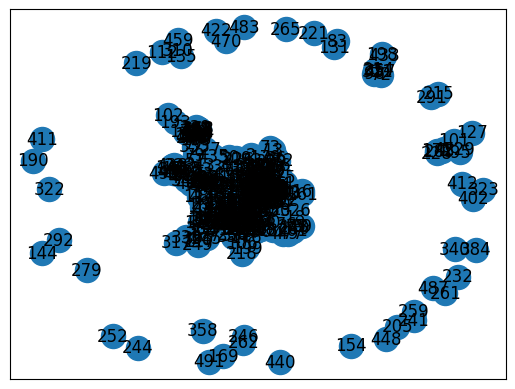

In [56]:
from networkx import draw_networkx

matrix = np.where(matrix > 0.9, 1, 0)
G = from_numpy_array(matrix)

draw_networkx(G)